# **LogisticRegression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the data from csv file to as a pandas Dataframe
raw_mail_data = pd.read_csv('/content/spam.csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

**Label encoding**

In [ ]:
# label spam mail as 0; ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**Splitting the data into training data & test data**

In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


**Feature Extraction**

In [ ]:
#Convert The Y text into valuers using Feature Extraction
#Create Values of the frature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

#Convert to fit
X_train_features = feature_extraction.fit_transform(X_train)

#Convert Transforms
X_test_features = feature_extraction.transform(X_test)

#Convert Y values into integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
#Traing my model ML using Logistic Regression

model = LogisticRegression()

In [ ]:
#Traing the ML

model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
#testing using Train Data

test_on_train_data = model.predict(X_train_features)

#accuracy of testing

accuracy_on_train_data = accuracy_score(Y_train, test_on_train_data)

print('Accuracy : ', accuracy_on_train_data)

Accuracy :  0.9676912721561588


In [ ]:
#final Evaluation for the ML model
#making a new mail

test_input_mail = ["I will be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
test_input_mail = ["Had your mobile and PC been for 11 months or more? U are entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
#Convert it into Feature

test_input_mail_features = feature_extraction.transform(test_input_mail)

#making a prediction
prediction = model.predict(test_input_mail_features)

print(prediction)

#change into text output
if prediction[0] ==1 :
  print('ham')
else:
  print('spam')

[0]
spam


# **Random Forest**

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load your dataset
# Assume `emails.csv` has two columns: 'text' for email content and 'label' for spam (1) or not (0)
data = pd.read_csv('emails.csv')

In [ ]:
# Separate features and labels
X = data['text']
y = data['label']

In [ ]:
# Convert text data into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.97847533632287
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# **SVM**
(support vector machine)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load your dataset
data = pd.read_csv('emails.csv')

In [ ]:
# Separate features and labels
X = data['text']  # This is our email text
y = data['label']  # This is the label (1 for spam, 0 for not spam)

In [ ]:
# Split the dataset into training and testing sets (this is done on the raw text data)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert the email text data into numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')


In [ ]:
# Fit the vectorizer on the training data and transform it
X_train = vectorizer.fit_transform(X_train_raw)

In [ ]:
# Now transform the test data using the same vectorizer (do not use fit_transform)
X_test = vectorizer.transform(X_test_raw)

In [ ]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

In [ ]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)


In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# KNN algorithm

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset (Ensure your dataset contains 'text' and 'label' columns)
data = pd.read_csv('emails.csv')

In [ ]:
# Separate features and labels
X = data['text']  # Email text data
y = data['label']  # 1 for spam, 0 for not spam

In [ ]:
# Split the dataset into training and testing sets (raw text data)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert the email text data into numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')


In [ ]:
# Fit the vectorizer on the training data and transform it
X_train = vectorizer.fit_transform(X_train_raw)


In [ ]:
# Now transform the test data using the same vectorizer (do not use fit_transform)
X_test = vectorizer.transform(X_test_raw)


In [ ]:
# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors


In [ ]:
# Train the model on the training data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
y_pred = knn_model.predict(X_test)


In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9184


In [ ]:
# Classification report provides precision, recall, F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Classification Report:
               precision    recall  f1-score   support

         ham       0.91      1.00      0.96       966
        spam       1.00      0.39      0.56       149

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.76      1115
weighted avg       0.93      0.92      0.90      1115



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[966   0]
 [ 91  58]]


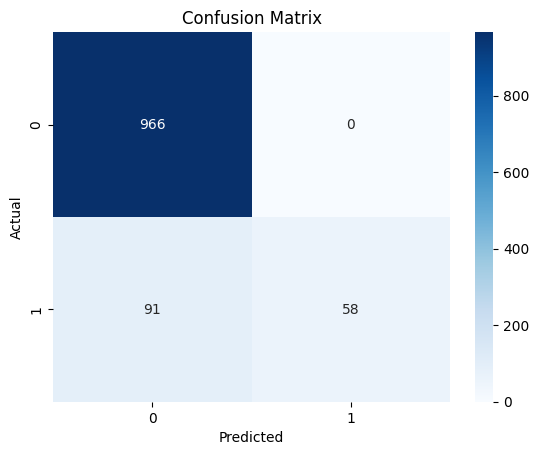

In [ ]:
# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Comparison**

**To compare Logistic Regression (LR), Random Forest (RF), Support
Vector Machine (SVM), and K-Nearest Neighbors (KNN) algorithms on email spam detection, we can implement all four models using scikit-learn and evaluate them on the same dataset.**




Training Logistic Regression...

Logistic Regression Accuracy: 0.9839

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99       966
        Spam       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Training Random Forest...

Random Forest Accuracy: 0.9776

Random Forest Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.99       966
        Spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Training SVM...

SVM Accuracy: 0.9839

SVM Classification Report:
              precision    recall  f1-score   support

    Not Spam   

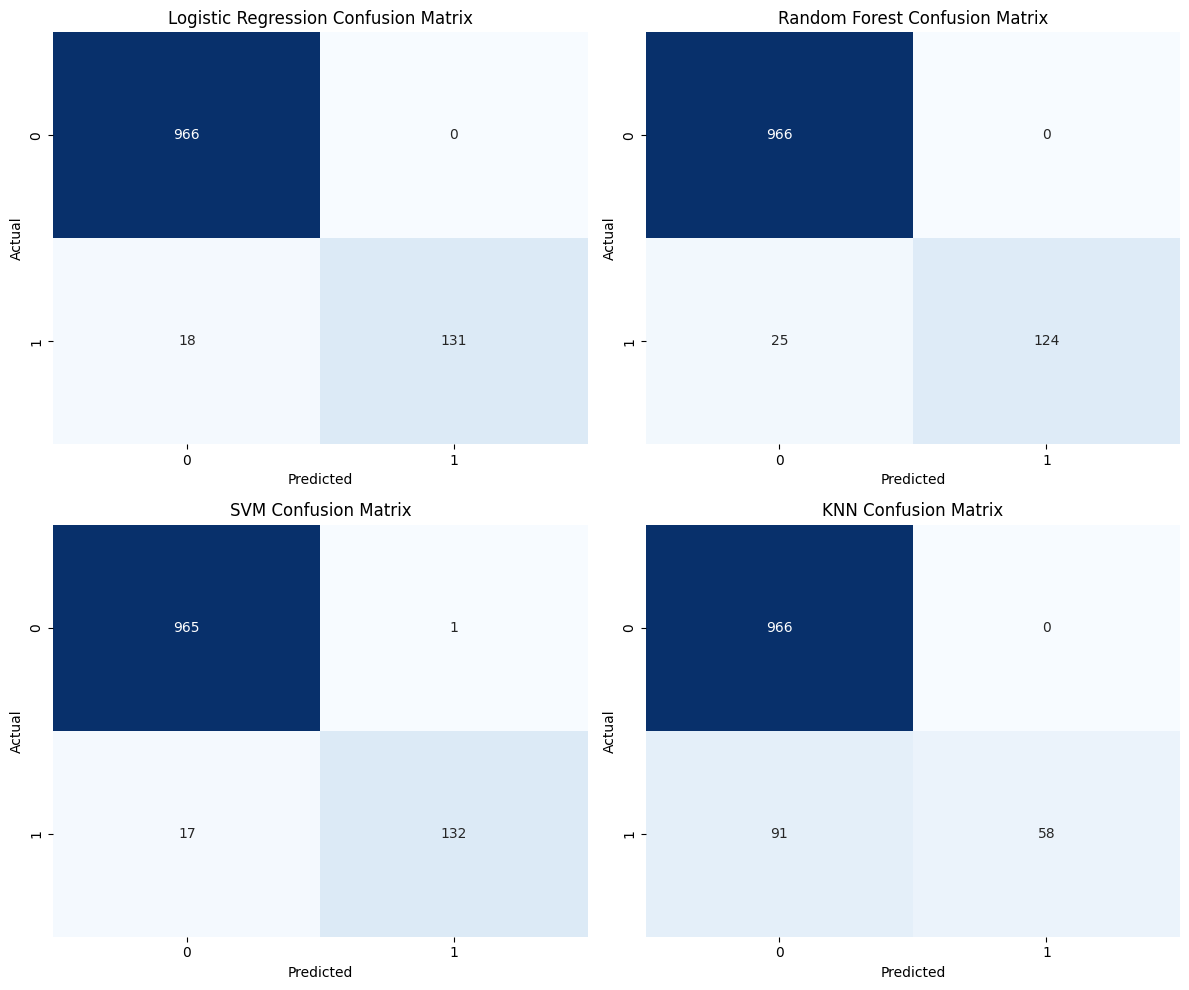

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (assuming it has 'text' and 'label' columns)
data = pd.read_csv('emails.csv')

# Separate features and labels
X = data['text']  # Email text data
y = data['label']  # 1 for spam, 0 for not spam

# Split the dataset into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the email text data into numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f}")

    report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
    print(f"\n{name} Classification Report:\n{report}")

    # Store the results for comparison
    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "y_pred": y_pred
    }

# Visualize the confusion matrices
plt.figure(figsize=(12, 10))
for i, (name, result) in enumerate(results.items(), 1):
    conf_matrix = confusion_matrix(y_test, result['y_pred'])

    # Plot confusion matrix
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# **Explanation:**



**1.Data Preprocessing:**




*   The dataset is split into training and test sets using train_test_split().
*   The CountVectorizer is used to convert the email text into numerical features, creating a bag-of-words representation.

**2.Model Definitions:**

*  Four models are defined: Logistic Regression, Random Forest, SVM, and KNN using their respective scikit-learn implementations.

**3.Training and Evaluation:**


*   For each model, the training is done using model.fit(), and predictions are made using model.predict()
*   The model's accuracy is printed, and a classification report (precision, recall, F1-score) is generated for each model.

*   Results, including the accuracy and classification report, are stored for further analysis.

**4.Confusion Matrix Visualization:**

*   Confusion matrices for each model are displayed using seaborn's heatmap function, allowing a visual comparison of the performance of each model in terms of true positives, true negatives, false positives, and false negatives.

**Output:**


*   **Accuracy** for each model.

*   **Classification Report** for each model, showing precision, recall, and F1-score for spam and not-spam emails.

*   **Confusion Matrix** plots for each model, giving a quick view of model performance in predicting spam and non-spam emails.









